# Kmeans algorithm 
- It is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.
- It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible.
- It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is at the minimum. 

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmeans import Kmeans

In [55]:
raw_data = pd.read_csv("D:/Document/Datasets/Mall_Customers.csv")

In [56]:
raw_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
raw_data_copy.describe()

,Gender,Age,income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [62]:
raw_data_copy.isnull().sum()

Gender            0
Age               0
income            0
Spending_score    0
dtype: int64

In [63]:
raw_data_copy = raw_data.drop('CustomerID',axis=1)

In [64]:
raw_data_copy.rename(columns={'Genre':'Gender','Annual Income (k$)':'income','Spending Score (1-100)':'Spending_score'},inplace=True)

In [65]:
raw_data_copy.replace(to_replace=["Male","Female"],value=[0,1],inplace=True)

In [66]:
raw_data_copy

,Gender,Age,income,Spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [67]:
data = np.array(raw_data_copy)
data = (data - data.mean()) / (data.std())

In [68]:
kcluster = Kmeans(5,max_iters=500)

In [69]:
kcluster.fit(data)

In [70]:
def plot(data,labels):
    '''
    Function to plot the clustered data.
    '''
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = ["blue",'green','red','cyan','magenta','yellow','black']
    for i in range(kcluster.n_cluster):
        plt.scatter(data[labels == i, 2], data[labels == i, 3],
                c=colors[i], label= f'cluster {i}')
    # plt.scatter(kcluster.centroids[:, 0], kcluster.centroids[:, 1], marker='*', s=300,
    #              c='r', label='centroid')
    plt.legend()

    plt.title('Visualization of clustered data', fontweight='bold')
    ax.set_aspect('equal');

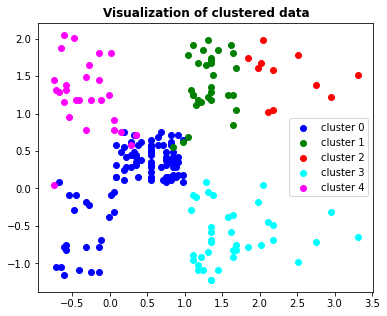

In [71]:
plot(data,kcluster.labels)

# Elbow Method:
Graphical tool which uses the distortions or (sum of squarred distance) or **Inertia** to find the optimum number of clusters.
We use the number of cluster where the the graph flattens.

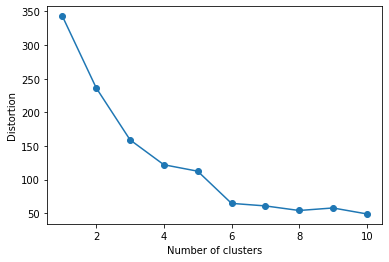

In [72]:
distortions = []
for i in range(1, 11):
    km = Kmeans(i,300)
    km.fit(data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As we can see the graph flattens around 6-7 clusters

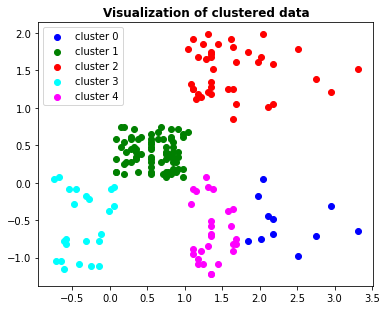

In [73]:
kcluster1 = Kmeans(6,max_iters=300)
kcluster1.fit(data)
plot(data,kcluster1.labels)

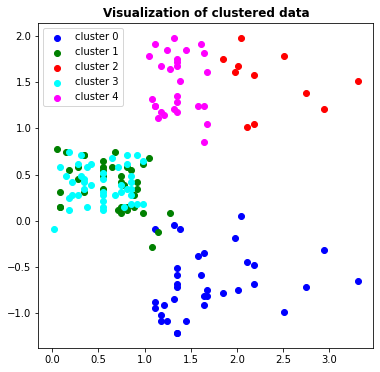

In [74]:
kcluster2 = Kmeans(7,max_iters=300)
kcluster2.fit(data)
plot(data,kcluster2.labels)